In [1]:
import seaborn as sns
import faceted as faceted
import xarray as xr
import numpy as np
import matplotlib as mpl
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('hls', 4)
sns.set_style('ticks')

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "text.latex.preamble": "\n".join([r'\usepackage{amsmath}'])
})      

In [2]:
wet_out = "../data/LES/reisner_case/moist_soot_xsection.nc"
dry_out = "../data/LES/reisner_case/dry_soot_xsection.nc"

In [3]:
ds_wet = xr.open_dataset(wet_out)
ds_dry = xr.open_dataset(dry_out) 

In [4]:
ds_wet = ds_wet.sel(z=slice(None, 15e3))
ds_dry = ds_dry.sel(z=slice(None, 15e3))

/tmp/ipykernel_159135/558305742.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels([0,0,10,20,30,40])
/tmp/ipykernel_159135/558305742.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels([0,0,10,20,30,40])


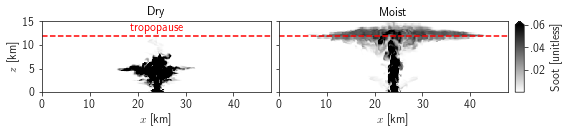

In [32]:
aspect = (ds_wet.z.max()/ds_wet.x.max()).item()

fig, axis, caxis = faceted.faceted(1, 2, aspect=aspect, cbar_mode='edge',
                                   left_pad=.6, right_pad=.7, bottom_pad=.6,
                                   internal_pad=.1, cbar_pad=.1, 
                                   width=8.0, sharey=True, sharex=False)

abs(ds_wet.soot).isel(time=-1).plot(ax=axis[1], cmap='binary', vmin=0, vmax=.06, add_colorbar=False)

fmt = lambda x, pos: '{:.2f}'.format(x).lstrip('0')
# cbar = plt.colorbar(format=FuncFormatter(fmt))

abs(ds_dry.soot).isel(time=-1).plot(ax=axis[0], cmap='binary', cbar_ax=caxis[0], vmin=0, 
                                    vmax=.06, cbar_kwargs={'label': "Soot [unitless]", "format": fmt,
                                                         "ticks": [.02, .04, .06]})                                                                                            
axis[0].set_xlabel("$x$ [km]")
axis[1].set_xlabel("$x$ [km]")

axis[0].set_ylabel("$z$ [km]")
axis[1].set_ylabel("$z$ [km]")

axis[0].set_title(" ")
axis[1].set_title(" ")

axis[1].set_ylabel(" ")

axis[0].set_yticks([0,5e3, 10e3, 15e3])

axis[0].text(23925., 13.5e3, "tropopause", horizontalalignment='center',
             verticalalignment='center', color='red')
axis[0].axhline(y=12e3, linestyle='dashed', color='red')
axis[1].axhline(y=12e3, linestyle='dashed', color='red')

axis[0].set_yticklabels([0,5, 10, 15])

axis[0].set_xticklabels([0,0,10,20,30,40])
axis[1].set_xticklabels([0,0,10,20,30,40])


axis[0].set_title("Dry", color='black', fontsize=12)
axis[1].set_title("Moist", color='black', fontsize=12)